In [1]:
# importing these libraries to use to work with the housing dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from wordcloud import WordCloud

## Task 01 - Start

#### Examing the data, there may be some anomalies in the data, and you will have to clean the data before you move forward to other tasks. Explain what you did to clean the data. 

In [2]:
# using Pandas to load the CSV file from within the same directory

dataset = pd.read_csv('./AB_NYC_2019.csv')

In [3]:
# printing out the head of the dataset for viewing
# noticing the third row, when the number of reviews is equal to 0, the last_review column
# and the reviews_per_month column both have NaN values, which means that no value was entered into the CSV block.

dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
# seeing how many missing values there are per each column
#     (1) can see that there are 16 listings where the name of the Airbnb is not available
#     (2) can also see that there are 21 listings where the host name is not available
#     (3) for the last review and reviews per month, there are 10,052 missing data entries.
#             As the cell above has shown, the 10052 missing entries for last_review and reviews_per_month
#             may be attributed to the number_of_reviews column being equal to a 0.

missing_count = dataset.isna().sum()
print(missing_count)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [5]:
# seeing how many rows there are

print("The number of rows is:",dataset.shape[0])

# seeing how many columns there are

print("The number of columns is:", dataset.shape[1])

The number of rows is: 48895
The number of columns is: 16


In [6]:
# There are 16 rows where the name of the airbnb listing is missing.
# There are 21 rows where the host_name of the airbnb listing is missing.
# Will remove those rows since those entries are miniscule compared to the 48,895 total rows in the dataset.

dataset = dataset.dropna(axis=0, subset=['name'])
dataset = dataset.dropna(axis=0, subset=['host_name'])

In [7]:
# since the number of reviews is equal to 0 for a listing, it's only reasonable to set the 
# reviews_per_month value equal to 0 too since no reviews have been entered.
# there is no change made to the last_review column since there can't be a date equal to 0.

dataset.loc[dataset['number_of_reviews'] == 0, 'reviews_per_month'] = 0

In [8]:
# Printing the count of missing values in the current dataset.
# Notice the 10,037 missing values in the last_review column, which is acceptable.
# Can be explained by the fact that those listings haven't had a rating before.
# The number of reviews and the reviews per month would have to be equal to 0.

missing_count = dataset.isna().sum()
print(missing_count)

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [9]:
# Seeing how many rows there are after removing the rows where
#     (1) the name of the listing is missing
#     (2) the host name of the listing is missing

print("The number of rows after clearing rows with missing name/host name:", dataset.shape[0])

The number of rows after clearing rows with missing name/host name: 48858


In [10]:
# Printing the number of rows whose value in availability_365 is equal to 0.

# Noticing that the number of listings that are not available during the year to the public
# is 17,508, will leave those rows within the dataset since the percentage compared to the
# 48,858 listings is very significant. Removing those listings would be a bad move.

availability = len(dataset[dataset['availability_365']<=0])
print("The number of listings that are not available to rent during the year is:",availability)

The number of listings that are not available to rent during the year is: 17508


In [11]:
# Examining the details about the dataset such as min, max, and mean of 10 columns that involve numeric values.
# Missing columns: name, host_name, neighbourhood_group, neighbourhood, room_type, last_review

dataset.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,40.728941,-73.952170,152.740309,7.012444,23.273098,1.091124,7.148369,112.801425
std,1.098289e+07,7.862389e+07,0.054528,0.046159,240.232386,20.019757,44.549898,1.597270,32.964600,131.610962
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,40.763107,-73.936280,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [12]:
# Noticed that the minimum pricing of a listing is $0, which is highly unreasonable.
# Will have to remove the rows/listings where the price is $0.

# Printing the number of listings where the price is $0.
print("The number of listings with price of $0 is:", len(dataset[dataset['price'] == 0]))

The number of listings with price of $0 is: 11


In [13]:
# The number of listings with price $0 is 11, which is insignificant to the remaining number
# of listings, 48,858. Removing these listings would be acceptable.

# Removing the rows from the dataset if the price is equal to $0.

dataset = dataset[dataset['price'] != 0]

In [14]:
# Examining the number of listings with a minimum number of nights being greater than 28 days.
# These listings are reasonable since some homeowners may seek renters to stay for a longer
# period of time, rather than a short stay.

print("The number of listings with minimum nights being greater than or equal to 28 is:",len(dataset[dataset['minimum_nights'] >= 28]))

The number of listings with minimum nights being greater than or equal to 28 is: 5046


In [15]:
# Examining the number of listings with price greater than the 75th percentile, $175.
# Also examining the listings that may appear as outliers, but may be true representations
# of wealthier neighborhoods and/or those with greater foot traffic/demand, aka Manhattan.

# My decision is to keep them in the dataset since they are still valid listings, which probably
# have a targeted demographic that is more wealthy. 

print("The number of listings with price greater than $175:", len(dataset[dataset['price'] > 175]))
print("The number of listings with price greater than $1000:", len(dataset[dataset['price'] > 1000]))
print("The number of listings with price greater than $5000:",len(dataset[dataset['price'] > 5000]))

The number of listings with price greater than $175: 12167
The number of listings with price greater than $1000: 239
The number of listings with price greater than $5000: 20


In [16]:
# Printing out the shape of the dataset after cleaning the data for abnormalities.

print("The shape of the dataset after cleaning it is:", dataset.shape)

The shape of the dataset after cleaning it is: (48847, 16)


## Task 01 - Explanation

In the cells above, I have displayed my run through with examining the dataset with comments and print statements. Some anomalies in the data were dealt with, such as the listings with no names and/or host names. To deal with those listings, I removed them from the dataset, which consisted of 37 listings. Compared to the 48,895 total listings, I believed that the removal of 37 listings wouldn't contribute a significant impact to the statistical analysis of the dataset as a whole. There were also around 10,037 listings that had no value entered for "reviews_per_month", but I decided to set these empty blocks to a value of 0. This is because these listings had a value of 0 for their "number_of_reviews". 

Another anomaly that I had noticed was that the minimum pricing of the listings was 0, which is definitely not a normal sight. I printed out the number of listings with price 0 and saw that it was 11, which I believed the removal of these 11 listings would be insignificant compared to the remaining 48,858 listings. I decided to remove the listings with price 0. There were some other factors that I noticed that may have been anomalies, but I decided to leave untouched such as the availability being 0, which can be explained by the decision of a homeowner who doesn't want to rent out but has their home on the market. There were also some listings with prices that would be considered to be extremely high, such as prices being greater than $1,000 per night, but this could be reasonably explained for listings in Manhattan and more trendy neighborhoods such as Dumbo, Williamsburg, etc. The listing would cater to more wealthy clients, which explains my decision to keep those listings in the dataset.

## Task 02 - Start

### Examine how the prices of the Airbnb changes with the change in neighborhood.

#### (a) Find Top 5 and Bottom 5 neighborhood based on the price of the Airbnb in that neighborhood (select only neighborhoods with more than 5 listings).

In [17]:
# Creating a copy of the dataset dataframe since changes made to the copy will not affect
# the original dataset variable. For this task, want to look at neighborhoods that appear
# more than 5 times. Will have to filter out the listings in the neighborhoods that appear
# 5 or less times.

data_gt5 = dataset.copy()


In [18]:
# Applying a filtering function to keep the listings that are in the neighborhoods
# that appear more than 5 times. This can be achieved with a lambda function in the filter.

data_gt5 = data_gt5.groupby('neighbourhood').filter(lambda x: len(x)>5)
data_gt5.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [19]:
# Examining the shape of the dataset of the listings that satisfy the condition that
# their neighborhood appears more than 5 times. 

print("The shape of this dataset with neighborhoods greater than 5 is:", data_gt5.shape)

# The dataset before filtering was (48847, 16), but after filtering it was (48755, 16).
# There were 92 listings that were removed and won't be considered when determining
# the top 5 / bottom 5 neighborhoods based on their listings' prices.

The shape of this dataset with neighborhoods greater than 5 is: (48755, 16)


In [20]:
# Sorting the dataset by the neighborhood's and the mean value of the listing prices.
# Decided to use mean instead of median because there are values that can contribute to a
# smaller or larger average value, as opposed to choosing a price from the middle.

data_gt5 = data_gt5.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False)


In [21]:
# Returning the top 5 neighborhoods based on the price of the Airbnb in that neighborhood.
# These neighborhoods are the most expensive.

print("These are the top 5 neighborhoods (The most expensive $$$)")
data_gt5.head()


These are the top 5 neighborhoods (The most expensive $$$)


neighbourhood
Tribeca              490.638418
Sea Gate             487.857143
Riverdale            442.090909
Battery Park City    367.086957
Flatiron District    341.925000
Name: price, dtype: float64

In [22]:
# Returning the bottom 5 neighborhoods based on the price of the Airbnb in that neighborhood.
# These neighborhoods are the least expensive.

print("These are the bottom 5 neighborhoods (The least expensive $)")
data_gt5.tail()

These are the bottom 5 neighborhoods (The least expensive $)


neighbourhood
Bronxdale      57.105263
Soundview      53.466667
Tremont        51.545455
Hunts Point    50.500000
Bull's Head    47.333333
Name: price, dtype: float64

## Task 02 - Continued.

#### (b) Analyze the price variation between different neighborhood groups, and plot these trends.

In [23]:
# Creating a copy of the dataset to sort into groups based on neighborhood groups.
# Finding the mean value for each neighborhood group to present in a bar plot.

data_nb_group_mean = dataset.copy()
data_nb_group_mean = data_nb_group_mean.groupby(['neighbourhood_group'])['price'].mean().sort_values(ascending=False)

# Displaying the most expensive to least expensive neighborhood groups and their mean prices 

data_nb_group_mean

neighbourhood_group
Manhattan        196.906571
Brooklyn         124.466285
Staten Island    114.812332
Queens            99.536017
Bronx             87.549632
Name: price, dtype: float64

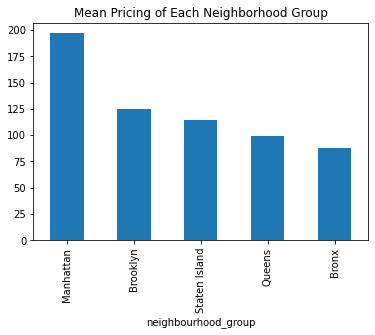

In [24]:
# Examining the bar plot below, we are able to analyze the price differences between different
# neighborhood groups. We are able to see that Manhattan is the most expensive neighborhood
# group with an average pricing of $196.91. The next most expensive neighborhood group is going
# to have to be Brooklyn with an average pricing of $124.47. The third neighborhood group on the
# list is Staten Island with an average pricing of $114.81. The fourth neighborhood group on the 
# list is Queens with an average pricing of $99.54. The least expensive neighborhood group is
# the Bronx with an average pricing of $87.55.

# TLDR: The ranking of most expensive neighborhood group to the least expensive is as follows:
# Manhattan (196.91), Brooklyn (124.47), Staten Island (114.81), Queens (99.54), Bronx (87.55) 

bar_plot_mean = data_nb_group_mean.plot.bar(x='neighbourhood_group', y='price', title='Mean Pricing of Each Neighborhood Group')

In [25]:
# Copying the dataset again, but this time to display the box plot with the median pricing of the listings
# of each neighborhood group. This would illustrate a different perspective compared to the mean box plot.

data_nb_group_median = dataset.copy()
data_nb_group_median = data_nb_group_median.groupby(['neighbourhood_group'])['price'].median().sort_values(ascending=False)

# Displaying the most expensive to least neighborhood group based on median pricing

data_nb_group_median

neighbourhood_group
Manhattan        150.0
Brooklyn          90.0
Queens            75.0
Staten Island     75.0
Bronx             65.0
Name: price, dtype: float64

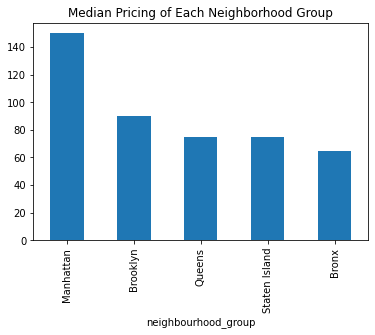

In [26]:
# Examining the bar plot below, we are able to analyze the price differences between the neighborhood
# groups based on their median pricing. Manhattan is the most expensive with their median price being
# $150.00. The 2nd most expensive neighborhood group is Brooklyn with a median price of $90.00. Next,
# there is a tie between Queens and Staten Island with a median price of $75.00. The least expensive
# neighborhood group is the Bronx with a median price of $65.00.

# TLDR: The most expensive to least expensive neighborhood groups based on their median pricing is as follows:
# Manhattan ($150), Brooklyn ($90), Queens and Staten Island ($75), the Bronx ($65)

bar_plot_median = data_nb_group_median.plot.bar(x='neighbourhood_group', y='price', title='Median Pricing of Each Neighborhood Group')

## Task 02 - Explanation

#### (a) The Top 5 and Bottom 5 neighborhoods based on the price of the Airbnb in that neighborhood

The Top 5 neighborhoods, which were the most expensive, based on the mean pricing of their Airbnb listings were:

1. Tribeca              490.64

2. Sea Gate             487.86

3. Riverdale            442.09

4. Battery Park City    367.09

5. Flatiron District    341.93


The Bottom 5 neighborhoods, which were the least expensive, based on the mean pricing of their Airbnb listings were:

1. Bronxdale      57.11

2. Soundview      53.47

3. Tremont        51.55

4. Hunts Point    50.50

5. Bull's Head    47.33


#### (b) Analyzing the price variation between different neighborhood groups, and plotting those trends

The neighborhood groups ranked from most expensive to least expensive, based on the mean price of their listings, appears as follows:

Manhattan (\\$196.91), Brooklyn (\\$124.47), Staten Island (\\$114.81), Queens (\\$99.54), Bronx (\\$87.55)

The neighborhood groups ranked from most expensive to least expensive, based on the median price of their listings, appears as follows:

Manhattan (\\$150), Brooklyn (\\$90), Queens and Staten Island (\\$75), the Bronx (\\$65)

Examining both rankings of the mean and median pricing, Manhattan stays the most expensive. Brooklyn is the second most expensive. Between Staten Island and Queens, Staten Island is more expensive in terms of mean pricing, but is tied with Queens in terms of median pricing. The least expensive neighborhood group is the Bronx.

## Task 03 - Start

### Select a set of the most interesting features. Do a pairwise Pearson correlation analysis on all pairs of these variables. Show the result with a heat map and find out most positive and negative correlations.

In [27]:
# Printing out the columns of the dataset to see what could be an interesting
# set of features to analyze. 

dataset.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [28]:
# There are some features that don't seem to be very interesting such as 
# id and host_id, which could be randomly generated by the system's id 
# generator. The latiture and longitude could be simplified to the values 
# of neighborhood and neighborhood group, so they could be dropped.
# I will also decide to drop the last review column since the recency 
# of a listing being rented out doesn't contribute nearly as much 
# information compared to the other features of the dataset.

data_interesting = dataset.copy()
data_interesting = data_interesting.drop(['id', 'host_id', 'latitude', 'longitude', 'last_review'], axis=1)

In [29]:
# Applying a function to find the Pearson correlation between the values
# in our new dataset, data_interesting.

int_corr = data_interesting.corr(method='pearson')

# Displaying the Pearson correlation chart to user.
int_corr

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.042810,-0.047920,-0.050552,0.057450,0.081836
minimum_nights,0.042810,1.000000,-0.081573,-0.127342,0.131315,0.145924
number_of_reviews,-0.047920,-0.081573,1.000000,0.589125,-0.072417,0.171803
reviews_per_month,-0.050552,-0.127342,0.589125,1.000000,-0.047375,0.163683
calculated_host_listings_count,0.057450,0.131315,-0.072417,-0.047375,1.000000,0.225795
availability_365,0.081836,0.145924,0.171803,0.163683,0.225795,1.000000


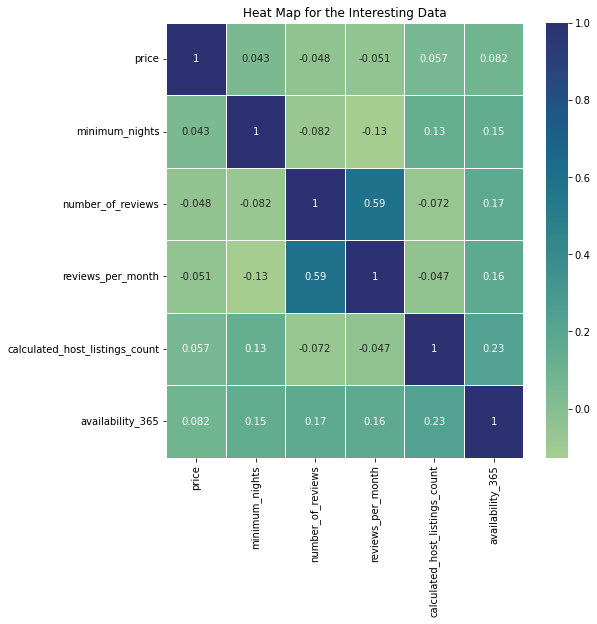

In [30]:
# Displaying the heat map of the Pearson correlation

fig, ax = plt.subplots(figsize=(8,8))
sb.heatmap(int_corr, cmap="crest", annot=True, linewidths=0.5)
ax.set_title("Heat Map for the Interesting Data")
plt.show()

In [31]:
# From the heat map of the Pearson correlation analysis on all pairs 
# of those variables, we can notice that the colors closest to dark Blue
# indicate a moderately positive correlation, while a lighter and more
# green/light green color indicates a negative correlation.

# After analyzing the heat map, I am able to determine that the most 
# positive correlation is between the reviews per month and the
# number of reviews that a Airbnb listing receives. The Pearson correlation
# coefficient for that relationship is 0.59, which is indicated by the
# blue color in the above heat map.

# I am also able to determine that the most negative correlation is between
# the reviews per month and the minimum nights of an Airbnb listing.
# The Pearson correlation coefficient for that relationship is -0.13, which
# is the lowest value in the heat map, but it is relatively close to 0,
# which indicates a near neutral correlation between the two features.
# This most negative value can be determined by its light green color
# in the heat map above.

In [32]:
# I will display the most positive values from the Pearson correlation.

print("Here are the most positive values from the Pearson Correlation")
positives = int_corr[int_corr!=1]
positives.max().sort_values(ascending=False)

# Notice how the values of 0.589125 are the same for number_of_reviews
# and reviews_per_month because their correlation is the highest.

# The 0.589125 correlation coefficient is greater than 0 and is moderately
# close to positive 1, which indicates a relatively linear relationship
# between the two features, number of reviews and reviews per month.

# What to take away from this correlation coefficient of 0.589125 is that
# an airbnb listing with a greater number of reviews would see a similarly
# high number of reviews per month. This is very reasonable because
# more reviews would definitely increase the monthly review rate. 

Here are the most positive values from the Pearson Correlation


number_of_reviews                 0.589125
reviews_per_month                 0.589125
calculated_host_listings_count    0.225795
availability_365                  0.225795
minimum_nights                    0.145924
price                             0.081836
dtype: float64

In [33]:
# I will display the most negative values from the Pearson correlation.

print("Here are the most negative values from the Pearson Correlation")
int_corr.min().sort_values(ascending=True)

# Notice how the values of -0.127342 are the same for minimum_nights
# and reviews_per_month because their correlation is the most negative.

# There isn't much to get away from the negative values in this Pearson
# correlation analysis since the coefficient is very close to 0, which would
# indicate that there is a near non-linear relationship between the two
# features, minimum nights and reviews per month.

Here are the most negative values from the Pearson Correlation


minimum_nights                   -0.127342
reviews_per_month                -0.127342
number_of_reviews                -0.081573
calculated_host_listings_count   -0.072417
price                            -0.050552
availability_365                  0.081836
dtype: float64

## Task 03 - Explanation

From the set of the most interesting features, the Pearson correlation was applied to the 6 applicable features of price, minimum nights, number of reviews, reviews per month, calculated host listings count, and availability 365. I used the Pandas dataframe function of corr() to acquire the Pearson correlation analysis then used Seaborn to display the heat map to the user. From the heat map, I was able to determine that the most positive correlation was between the number of reviews and the reviews per month, which had a correlation coefficient of 0.59. From the heat map, I was also able to determine that the most negative correlation was between the minimum nights and the reviews per month, which had a correlation coefficient of -0.13. Although, the 0.59 indicates a relatively moderate positive correlation, the -0.13 is very close to 0, which indicates a near non-linear relationship between the two features of the minimum nights and the reviews per month.

## Task 04 - Start

### The Latitude and Longitude of all the Airbnb listings are provided in the dataset.

#### (a) Plot a scatter plot based on these coordinates, where the points represent the location of an Airbnb, and the points are color coded based on the neighborhood group features.

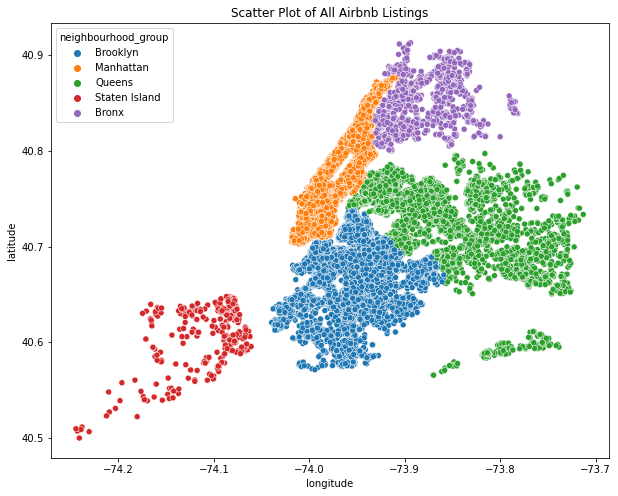

In [34]:
# Creating the scatter plot based on the (x,y) or (longitude, latitude)
# of all the Airbnb listings provided in the cleaned dataset. As viewed
# below, Brooklyn listings are indicated by the blue color, Manhattan
# listings are indicated by the orange color, Queens listings are indicated
# by the green color, Staten Island listings are indicated by the red color,
# and the Bronx listings are in purple.

fig, ax = plt.subplots(figsize=(10,8))
scatter_plot = sb.scatterplot(data=dataset, x='longitude', y='latitude', hue='neighbourhood_group')
ax.set_title("Scatter Plot of All Airbnb Listings")
plt.show()

## Task 04 - Continued.

#### (b) Now again, plot a scatter plot based on these coordinates, where the points represent the location of an Airbnb, and the points are color coded based on the price of the particular Airbnb, where price of the listing is less than 1000. Looking at the graph can you tell which neighborhood group is the most expensive.

In [35]:
# Grabbing the listings of the original dataset that satisfy the condition
# where price is less than 1000. 

# Added the sorting function to the dataset we are looking at since original
# approach without sorting resulted in the larger prices being under
# the less expensive points on the scatter plot. 

data_lt1000 = dataset[dataset['price'] < 1000].sort_values(by='price', ascending=True)

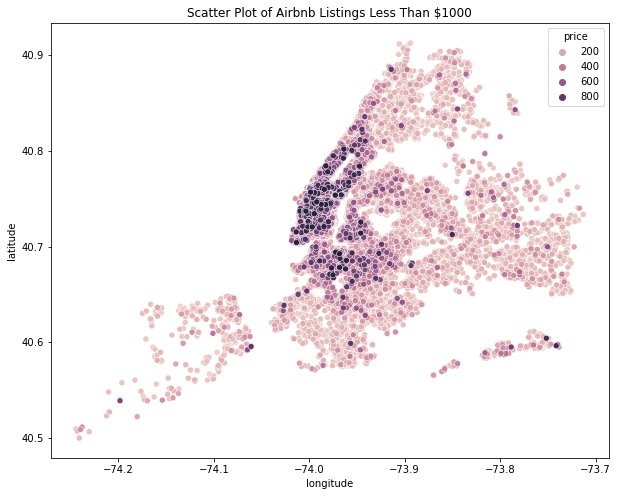

In [36]:
# Displaying the scatter plot of the airbnb listings that have a price
# less than $1000. As it can be examined from the scatter plot below, 
# the lighter points / more pink points indicate a lower pricing of the
# listing. However, the darker and more purple points indicate a more 
# expensive airbnb listing.

fig, ax = plt.subplots(figsize=(10,8))
scatter_plot = sb.scatterplot(data=data_lt1000, x='longitude', y='latitude', hue='price')
ax.set_title("Scatter Plot of Airbnb Listings Less Than $1000")
plt.show()

# As it can be examined from the scatter plot below, the appearance of 
# the darker, purple points are more densely grouped up within the 
# neighborhood group of Manhattan. Although, there are a considerable 
# amount of purple/dark points in Brooklyn, there seems to be a greater
# amount of purple/dark points in Manhattan.

# This leads to the conclusion that the most expensive neighborhood 
# group based on the scatter plot is Manhattan. 

## Task 04 - Explanation

This explanation is for Task 04 part b, where it asks to plot a scatter plot based on the airbnb listings' coordinates and have the points be color coded based on their prices. All this along with the requirement that the listings must have a price of less than \\$1000.

Looking at the scatter plot for task 04 part b, I was able to clearly notice that the majority of the darker/purple points were contained within the neighborhood group of Manhattan. Although, there were a considerable number of dark/purple points in the neighborhood group of Brooklyn. Overall, however, there were more dark/purple points in Manhattan, which I decided was the most expensive neighborhood group of all five neighborhood groups.

## Task 05 - Start

### Word clouds are a useful tool to explore the text data. Extract the words from the name of the Airbnb and generate a word cloud.

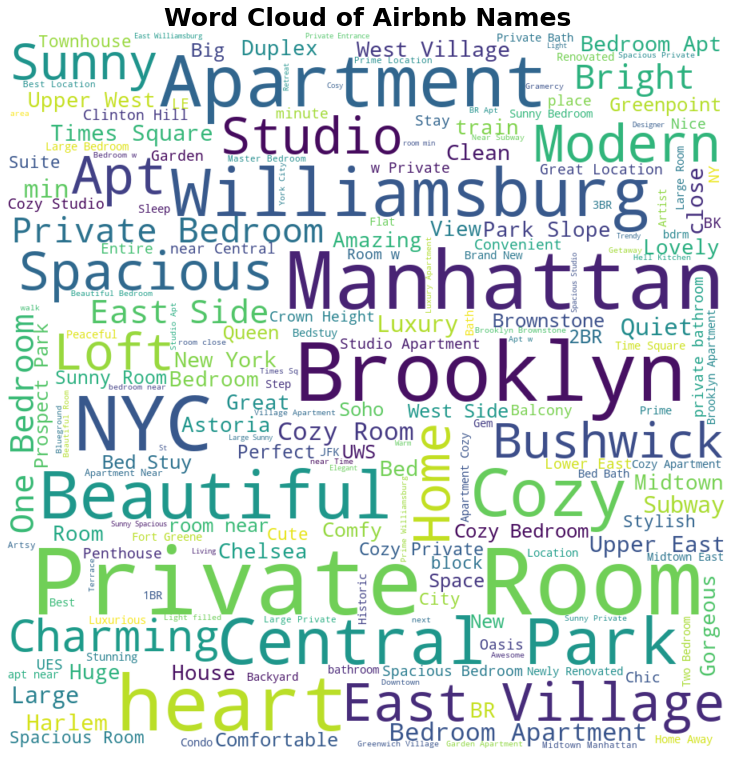

In [37]:
# Using the WordCloud generator from the imported library, wordcloud.
# Making the dimensions of the word cloud large so viewers can easily
# point out which words are used more often than others. 

name_cloud = WordCloud(background_color="white", width=900, height=900).generate(' '.join(dataset['name']))

plt.figure(figsize=(12,10) )
plt.axis("off")
plt.imshow(name_cloud, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.title('Word Cloud of Airbnb Names', fontsize=25, fontweight='bold')
plt.show()

## Task 05 - Explanation

The word cloud above shows which words and terms were used most in all the names of the Airbnb listings from the dataset. After an initial look at the word cloud, we can see that some of the most used words in the names of the Airbnb listings were: "Private Room", "NYC", "Brooklyn", "Manhattan", "Central Park", "East Village", and "Williamsburg". There were also listings using words that were less popular/frequent within the dataset such as: "Artist", "Greenwich Village", "3BR", "Private Entrance", and "Getaway".

After looking at the words and phrases that were most commonly used, I would have to say that they are more eyecatching and generally something someone searching for an Airbnb listing would search into their search bar. Terms such as "3BR" and "Artist" aren't typically something a person would search for, but stumble upon in the Airbnb listing's description page.

## Task 06 - Start

### Find out which areas have the busiest (hosts with high number of listings) hosts. Are there any reasons, why these hosts are the busiest, considering factors such as the availability, price, review, etc.? Bolster your reasoning with different plots and correlations.

In [43]:
busy_hosts = dataset.groupby(['host_id','neighbourhood_group'])['calculated_host_listings_count'].count().sort_values(ascending=False)

In [55]:
busy_hosts.head()

host_id    neighbourhood_group
219517861  Manhattan              327
107434423  Manhattan              230
30283594   Manhattan              121
12243051   Manhattan               96
16098958   Manhattan               96
Name: calculated_host_listings_count, dtype: int64

In [49]:
busy01 = dataset[dataset['host_id'] == 219517861]
busy01.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
38293,30181691,Sonder | 180 Water | Incredible 2BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,NaN,0.00,327,309
38294,30181945,Sonder | 180 Water | Premier 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,2019-05-29,0.73,327,219
38588,30347708,Sonder | 180 Water | Charming 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,2019-05-21,0.60,327,159
39769,30937590,Sonder | The Nash | Artsy 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,2,8,2019-06-09,1.86,327,91
39770,30937591,Sonder | The Nash | Lovely Studio + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,2,14,2019-06-10,2.59,327,81


In [50]:
busy02 = dataset[dataset['host_id'] == 107434423]
busy02.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
26137,20845031,"Homey Midtown East 1BR w/ Gym, Doorman, near t...",107434423,Blueground,Manhattan,Kips Bay,40.74510,-73.97915,Entire home/apt,308,30,0,NaN,0.00,232,156
29128,22370388,"Calming FiDi 1BR w/ lux Gym, Speakeasy + Doorm...",107434423,Blueground,Manhattan,Financial District,40.70637,-74.00941,Entire home/apt,271,30,1,2018-08-17,0.09,232,310
30158,23264421,"Mod Midtown East 1BR w/ Gym, walk to Grand Cen...",107434423,Blueground,Manhattan,Murray Hill,40.74900,-73.97961,Entire home/apt,289,30,0,NaN,0.00,232,223
30428,23538486,"Posh Park Avenue 1BR w/ Gym, Doorman in Midtow...",107434423,Blueground,Manhattan,Murray Hill,40.74891,-73.97887,Entire home/apt,305,30,1,2019-01-15,0.17,232,326
31506,24535218,"Luxury Tribeca 1BR w/ Gym, Doorman + Roof deck...",107434423,Blueground,Manhattan,Tribeca,40.71433,-74.01073,Entire home/apt,323,30,0,NaN,0.00,232,316


In [51]:
busy03 = dataset[dataset['host_id'] == 30283594]
busy03.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9740,7491713,NYC Lavish Studio Apartment Steps from SoHo!,30283594,Kara,Manhattan,Financial District,40.70862,-74.01408,Entire home/apt,169,30,3,2018-12-07,0.09,121,364
10075,7730160,Furnished NYC 1BR apt near Rockefeller Center!!!,30283594,Kara,Manhattan,Theater District,40.75967,-73.98573,Entire home/apt,135,30,0,NaN,0.00,121,174
10335,7913426,LUX 1-Bedroom NYC Apartment Near Times Square!,30283594,Kara,Manhattan,Theater District,40.75654,-73.98891,Entire home/apt,369,30,0,NaN,0.00,121,364
10398,7966358,NYC High End 2BR Midtown West Apt,30283594,Kara,Manhattan,Midtown,40.76633,-73.98145,Entire home/apt,335,30,0,NaN,0.00,121,201
10490,8045421,NYC Chelsea Luxury 1BR Apt,30283594,Kara,Manhattan,Chelsea,40.74465,-73.99253,Entire home/apt,129,30,3,2017-12-31,0.07,121,161


In [52]:
busy04 = dataset[dataset['host_id'] == 12243051]
busy04.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
30637,23702074,Sonder | 180 Water | Lovely 1BR + Rooftop,12243051,Sonder,Manhattan,Financial District,40.70738,-74.00493,Entire home/apt,212,29,0,NaN,0.00,96,332
30640,23702442,Sonder | 180 Water | Delightful 1BR + Rooftop,12243051,Sonder,Manhattan,Financial District,40.70753,-74.00514,Entire home/apt,205,29,1,2018-05-04,0.07,96,338
30649,23713405,Sonder | 180 Water | Luxurious 1BR + Rooftop,12243051,Sonder,Manhattan,Financial District,40.70805,-74.00581,Entire home/apt,205,29,2,2018-08-17,0.14,96,10
30653,23714684,Sonder | 180 Water | Stunning 1BR + Rooftop,12243051,Sonder,Manhattan,Financial District,40.70656,-74.00499,Entire home/apt,215,29,0,NaN,0.00,96,343
30694,23750623,Sonder | 180 Water | Grand 1BR + Rooftop,12243051,Sonder,Manhattan,Financial District,40.70786,-74.00476,Entire home/apt,220,29,0,NaN,0.00,96,220


In [53]:
busy05 = dataset[dataset['host_id'] == 16098958]
busy05.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5093,3662724,5144-Prime Doorman!78ST & Madison,16098958,Jeremy & Laura,Manhattan,Upper East Side,40.77448,-73.96102,Entire home/apt,175,30,2,2019-05-30,0.06,96,281
5123,3686493,Irving Place!Doorman!Laundry 5135,16098958,Jeremy & Laura,Manhattan,Gramercy,40.73632,-73.98475,Entire home/apt,175,30,0,NaN,0.00,96,312
5286,3819703,5107-Studio Doorman GYM LuX,16098958,Jeremy & Laura,Manhattan,Upper West Side,40.79082,-73.97452,Entire home/apt,140,30,4,2017-09-04,0.09,96,342
5357,3867705,5146-Doorman Pool!1 bedroom View,16098958,Jeremy & Laura,Manhattan,Upper West Side,40.79370,-73.96590,Entire home/apt,185,30,2,2018-07-16,0.13,96,310
5372,3882103,5136-Doorman 2 bedroom 3 beds!,16098958,Jeremy & Laura,Manhattan,Hell's Kitchen,40.76665,-73.98660,Entire home/apt,250,30,0,NaN,0.00,96,281
